In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

2022-01-10 19:09:56.417152: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [4]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)    # word : index

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [6]:
print(tokenizer.texts_to_matrix(texts, mode='count'))  # (텍스트, 모드)
# 입력된 텍스트 데이터로부터 행렬을 만드는 함수
# 모드 : binary, count, freq, tfidf

# count 모드 : DTM 생성
# !주의! 완성되는 행렬은 인덱스 0부터 시작 (그래서 행렬의 첫 번째 열은 값이 전부 0임)

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [7]:
print(tokenizer.texts_to_matrix(texts, mode='binary'))
# 해당 인덱스의 단어가 존재하는지만 판정

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [8]:
print(tokenizer.texts_to_matrix(texts, mode='tfidf').round(2))
# 그러나 tf의 정의 방식이 살짝 다름(자연로그(tf+1))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [9]:
print(tokenizer.texts_to_matrix(texts, mode='freq').round(2))
# 각 문서에서, 각 단어 등장 개수 / 각 문서에 등장한 모든 단어 개수 총 합

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
# 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

2022-01-10 19:36:18.180210: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
newsdata = fetch_20newsgroups(subset = 'train')
# 새 데이터 불러오기. subset : all (전체), train, test
print(newsdata.keys())
# 해당 데이터가 가지는 속성

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
print(f'훈련용 샘플의 개수 : {len(newsdata.data)}')

훈련용 샘플의 개수 : 11314


In [6]:
print(f'총 주제의 개수 : {len(newsdata.target_names)}')
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
print(f'첫 번째 샘플의 레이블 : {newsdata.target[0]}')

첫 번째 샘플의 레이블 : 7


In [8]:
print(f'7번 레이블이 의미하는 주제 : {newsdata.target_names[7]}')

7번 레이블이 의미하는 주제 : rec.autos


In [9]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [11]:
print(newsdata.target[1])
print(newsdata.data[1])

4
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [14]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [16]:
# null 값 가진 sample 있는지 확인
data.isnull().values.any()

False

In [35]:
# 샘플 중복 제거
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


<AxesSubplot:>

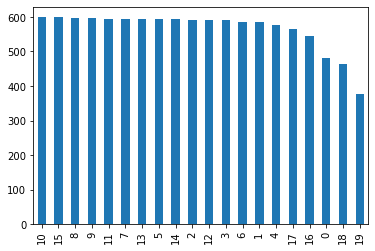

In [36]:
# 레이블 값 분포 시각화
data['target'].value_counts().plot(kind='bar')

In [37]:
# 각 레이블이 몇 개 있는지 구체적인 수치로 확인
print(data.groupby('target').size().reset_index(name='count'))
# target 별로 집계한 후, 그 수를 구한 뒤 'count'라고 새로 index를 명명하여 출력

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [39]:
# train data와 test data 준비
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [40]:
# 전처리 진행

# 필요한 변수 정의
vocab_size = 10000    # 최대 단어 개수
num_classes = 20

In [44]:
def preprocessing_data(train_data, test_data, mode):
    tokenizer = Tokenizer(num_words = vocab_size)
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
    return X_train, X_test, tokenizer.index_word # index : word

In [45]:
X_train, X_test, index_to_word = preprocessing_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [48]:
index_to_word

{1: 'the',
 2: 'to',
 3: 'of',
 4: 'a',
 5: "'ax",
 6: 'and',
 7: 'in',
 8: 'i',
 9: 'is',
 10: 'that',
 11: 'it',
 12: 'for',
 13: 'you',
 14: 'from',
 15: 'edu',
 16: 'on',
 17: 'this',
 18: 'be',
 19: 'are',
 20: 'not',
 21: 'have',
 22: 'with',
 23: 'as',
 24: '1',
 25: 'or',
 26: 'was',
 27: 'if',
 28: 'but',
 29: 'subject',
 30: 'they',
 31: 'com',
 32: 'lines',
 33: 'at',
 34: 'organization',
 35: 'by',
 36: '2',
 37: 'an',
 38: 'my',
 39: 'can',
 40: 'x',
 41: '3',
 42: 'what',
 43: '0',
 44: 'all',
 45: 'will',
 46: 'm',
 47: 'there',
 48: 'would',
 49: 'one',
 50: 'do',
 51: "'",
 52: 'about',
 53: 're',
 54: 'we',
 55: 'writes',
 56: 'so',
 57: 'he',
 58: 'your',
 59: 'no',
 60: 'has',
 61: 'article',
 62: 'any',
 63: 'me',
 64: 'some',
 65: 'who',
 66: 'out',
 67: 'which',
 68: '4',
 69: 'q',
 70: 'more',
 71: 'like',
 72: 'people',
 73: "don't",
 74: 'when',
 75: '5',
 76: 'just',
 77: 'university',
 78: 'posting',
 79: 'their',
 80: 'were',
 81: 'up',
 82: 'r',
 83: 'p',


In [47]:
print(f'train sample 본문의 크기 : {X_train.shape}')
print(f'train sample 레이블의 크기 : {X_train.shape}')
print(f'test sample 본문의 크기 : {X_test.shape}')
print(f'test sample 레이블의 크기 : {y_test.shape}')

train sample 본문의 크기 : (11314, 10000)
train sample 레이블의 크기 : (11314, 10000)
test sample 본문의 크기 : (7532, 10000)
test sample 레이블의 크기 : (7532, 20)


In [49]:
print(f'빈도수 상위 1번 단어 : {index_to_word[1]}')
print(f'빈도수 상위 9999번 단어 : {index_to_word[9999]}')
# 빈도수 상위 1번 단어의 경우 불용어(the) 출력

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [56]:
# MLP 사용해서 텍스트 분류

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout

In [59]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential([
        InputLayer(input_shape=(vocab_size,)),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]    # score = [loss, acc]

In [60]:
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
    X_train, X_test, _ = preprocessing_data(train_email, test_email, mode)
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 18ms/step - loss: 2.2432 - acc: 0.3462 - val_loss: 0.9487 - val_acc: 0.8154
Epoch 2/5
80/80 [==============================] - 1s 17ms/step - loss: 0.8470 - acc: 0.7716 - val_loss: 0.4606 - val_acc: 0.8825
Epoch 3/5
80/80 [==============================] - 1s 17ms/step - loss: 0.4388 - acc: 0.8861 - val_loss: 0.3602 - val_acc: 0.8940
Epoch 4/5
80/80 [==============================] - 1s 17ms/step - loss: 0.2599 - acc: 0.9363 - val_loss: 0.3186 - val_acc: 0.9011
Epoch 5/5
80/80 [==============================] - 1s 16ms/step - loss: 0.1700 - acc: 0.9562 - val_loss: 0.3050 - val_acc: 0.9099
binary 모드의 테스트 정확도: 0.8268719911575317
Epoch 1/5
80/80 [==============================] - 2s 18ms/step - loss: 2.7252 - acc: 0.2460 - val_loss: 1.6612 - val_acc: 0.7244
Epoch 2/5
80/80 [==============================] - 1s 16ms/step - loss: 1.4332 - acc: 0.6350 - val_loss: 0.7298 - val_acc: 0.8489
Epoch 3/5
80/80 [==============================] - 